# Homework 3 (Dev Mody)
## Exercise 1 (Breast Cancer Classification)

In this exercise you will compare the efficiency of the Softmax and the Perceptron cost functions in terms of the minimal number of misclassifications each can achieve by proper minimization via gradient descent on a breast cancer dataset, a description of which you can find here: $\texttt{https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+original}$. This dataset consists of $P = 699$ data points, each point consisting of $N = 9$ input of attributes of a single individual and output label indicating whether or not the individual does or does not have breast cancer. According to the website the rows correspond to:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In the attached data file $\texttt{breast\_cancer\_data.csv}$ the Sample Code Number (ID Number) has been removed, the Class has been changed to 1 for benign, -1 for malignant. Finally, the data has been arranged column-wise so that each individual correspond to a single column, with the final row being the label of each point. (In the original data set the data is arranged row-wise with each row corresponding to an individual). Also, the data for the Single Epithelial Cell Size has been removed so that the data in the end has N = 8 attributes. We can then import the feature vectors and the labels with the following commands:

```python
# data input
csvname = datapath + ’breast_cancer_data.csv’
data1 = np.loadtxt(csvname,delimiter = ’,’)
# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:]
```

### Exercise 1.1: Perceptron Model
We now need to implement the cost functions for the softmax, Eq (6.25) and perceptron Eq. (6.33) in the book. Finish the implementation of the perceptron below:

```python
# compute linear combination of input points
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
    
# an implementation of the softmax cost
def softmax(w):
    # compute the least squares cost
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

# an implementation of the perceptron cost
def perceptron(w):
```

ANSWER: My implementation of the Perceptron Cost is as follows

In [79]:
import numpy as np

def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

def softmax_cost (w):
    cost = np.sum(np.log(1 + np.exp(-y * model(x, w))))
    return cost / float(np.size(y))

def perceptron_cost(w):
    cost = np.sum(np.maximum(0, -y * model(x, w).flatten()))
    return cost / float(y.size)

csvname = "/Users/devmody/Documents/Courses/3ml3/homeworks/homework3/breast_cancer_data.csv"
data1 = np.loadtxt(csvname, delimiter=',')

x = data1[:-1, :]
y = data1[-1, :]

### Exercise 1.2 (Training the Model)
Use gradient descent (detailed on the previous assignments) with $\texttt{max\_its=1000}$, and a random starting vector $\texttt{w = 0.1*np.random.randn(9,1)}$ for both cost functions. For the perceptron cost function use $\texttt{alpha = 0.1}$ to determine the weight and cost history. For the softmax use $\texttt{alpha = 1.0}$ to determine the weight and cost history.

In [80]:
import autograd.numpy as np
from autograd import grad

def standard_gradient_descent (g, alpha, max_its, w):
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w)]
    for _ in range(max_its):
        eval_grad = gradient(w)
        w = w - alpha*eval_grad
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

w = 0.1 * np.random.randn(9, 1)
binary_model = model(x, w)
max_its = 1000
alpha_perceptron = 0.1
alpha_softmax = 1

weight_history_perceptron, cost_history_perceptron = standard_gradient_descent(
    g=perceptron_cost, alpha=alpha_perceptron, max_its=max_its, w=w
)
weight_history_softmax, cost_history_softmax = standard_gradient_descent(g=softmax_cost, alpha=alpha_softmax, max_its=max_its, w=w)


### Exercise 1.3 (Count Misclassifications)

Use the weight history to track the number of misclassifications as a function of the iterations by implementing a function `miscount(w,x,y)` that counts the number of misclassifications for each w such that we can easily construct a misclassfication history using the command `miscount_history = [miscount(v,x,y) for v in weight history]`. So, the function `miscount(w,x,y)` would use the arguments `w,x` in combination with the current model to obtain a prediction to be compared with the arguments `y`

ANSWER: The implementation of the `miscount` function is as follows:

In [81]:
def miscount (w, x, y):
    predictions = np.sign(model(x, w))  # Apply sign to get class predictions
    misclassified = predictions != y  # Compare with true labels
    return np.sum(misclassified)  # Count misclassified points

### Exercise 1.4 (Experiment)

Plot the cost function history and the misclassification history versus the number of iterations for the 2 cost functions together. Determine the minimum number of misclassifications for the 2 cost functions. For each of the cost functions modify `miscount(w,x,y)` to calculate only the misclassified malignant cases

ANSWER: The modified `miscount(w, x, y)` function, the minimum number of misclassifications and the plots are as follows

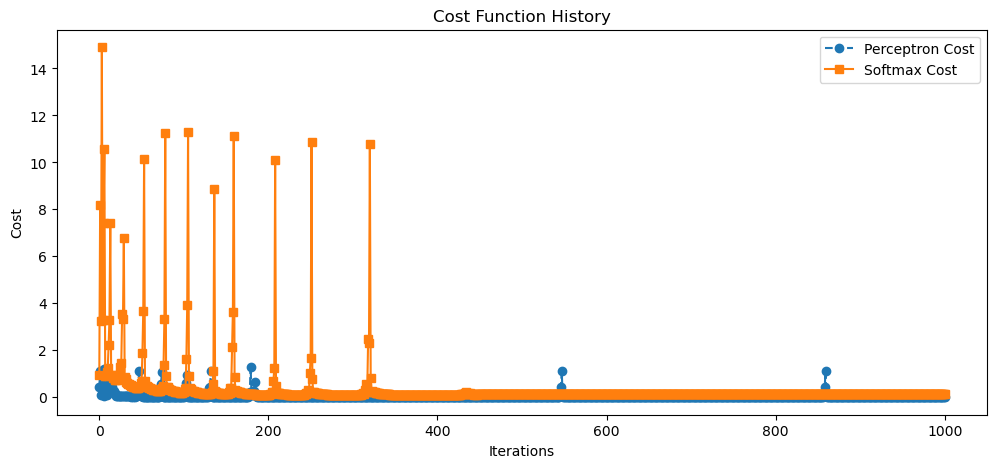

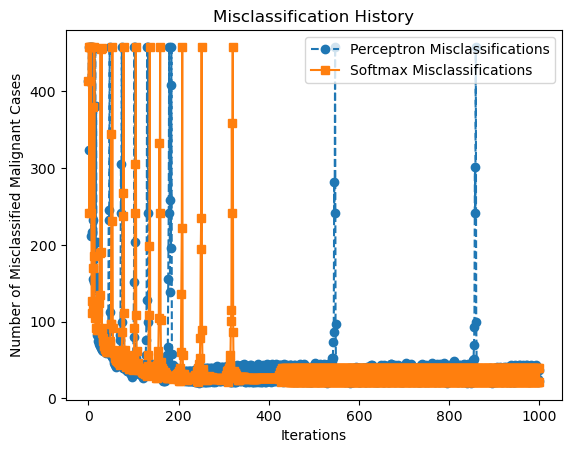

Minimum Misclassified Cases (Perceptron): 20
Minimum Misclassified Cases (Softmax): 21


In [82]:
import matplotlib.pyplot as plt

miscount_history_perceptron = [miscount(v, x, y) for v in weight_history_perceptron]
miscount_history_softmax = [miscount(v, x, y) for v in weight_history_softmax]

min_misclassified_perceptron = np.min(miscount_history_perceptron)
min_misclassified_softmax = np.min(miscount_history_softmax)

iterations = np.arange(len(cost_history_perceptron))

plt.figure(figsize=(12, 5))
plt.plot(iterations, cost_history_perceptron, label="Perceptron Cost", linestyle='--', marker='o')
plt.plot(iterations, cost_history_softmax, label="Softmax Cost", linestyle='-', marker='s')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function History")
plt.legend()
plt.show()

plt.plot(iterations, miscount_history_perceptron, label="Perceptron Misclassifications", linestyle='--', marker='o')
plt.plot(iterations, miscount_history_softmax, label="Softmax Misclassifications", linestyle='-', marker='s')
plt.xlabel("Iterations")
plt.ylabel("Number of Misclassified Malignant Cases")
plt.title("Misclassification History")
plt.legend()
plt.show()

print(f"Minimum Misclassified Cases (Perceptron): {min_misclassified_perceptron}")
print(f"Minimum Misclassified Cases (Softmax): {min_misclassified_softmax}")

def miscount_malignant (w, x, y):
    predictions = np.sign(model(x, w))  
    misclassified = (predictions != y) & (y == 1)
    return np.sum(misclassified)


### Exercise 1.5 (Logistic Regression and Cross Entropy Cost)

We now want to check that we can get very similar results by directly doing a logistic regression on the data with a cross entropy cost. In order to do that we create a new integer vector `yc` which is equal to `y` except all the values of $-1$ in `y` have been replaced with a $0$. Furthermore, note that `yc` has only a single index. We can do that (clumsily) using:

```python
a=np.argwhere(y>0.9)
b=np.argwhere(y<-0.9)
yc=np.arange(699)
yc[a]=1
yc[b]=0
```

We need `yc` to be integer because the cross entropy function (p. 134 in the book) has statements like `np.argwhere(yc==0)`. We can the use this slightly modified version of the cross entropy function where we have added a L2 regularization

```python
# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))
    
# the convex cross-entropy cost function
lam = 2*10**(-3)
def cross_entropy(w):
    # compute sigmoid of model
    a = sigmoid(model(x,w))
    # compute cost of label 0 points
    ind = np.argwhere(yc == 0)
    cost = -np.sum(np.log(1 - a[:,ind]))
    # add cost on label 1 points
    ind = np.argwhere(yc==1)
    cost -= np.sum(np.log(a[:,ind]))
    # add regularizer
    cost += lam*np.sum(w[1:]**2)
    # compute cross-entropy
    return cost/float(np.size(yc))
```

Using $\alpha = 0.6$ and again `max_its=1000` along with a similar random starting vector calculate the weight and cost history using logistic regression with gradient descent. Use the weight history to calculate the number of misclassifications. In this case you will need a modified miscount function. How will you define a misclassification in this case ?

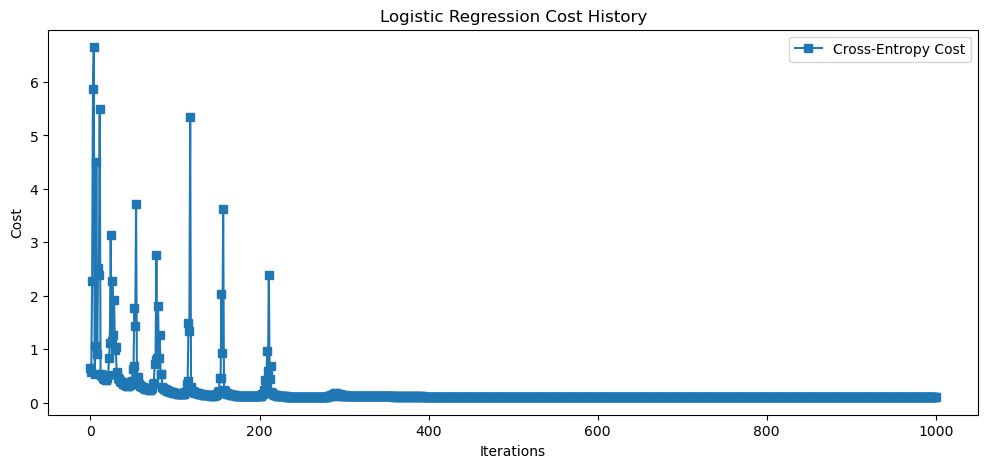

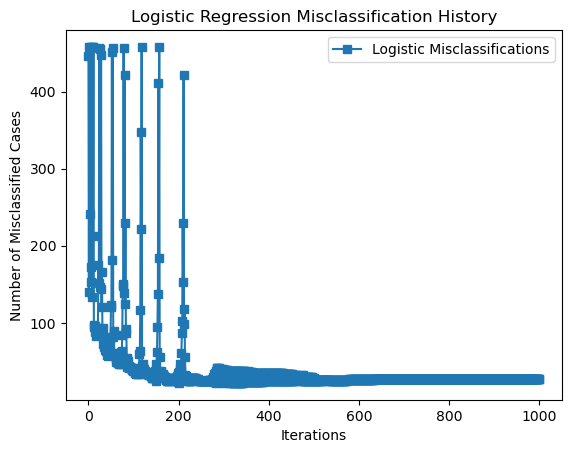

In [83]:
a=np.argwhere(y>0.9)
b=np.argwhere(y<-0.9)
yc=np.arange(699)
yc[a]=1
yc[b]=0

# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))
    
# the convex cross-entropy cost function
lam = 2*10**(-3)
def cross_entropy(w):
    a = sigmoid(model(x,w))
    ind = np.argwhere(yc == 0)
    cost = -np.sum(np.log(1 - a[:,ind]))
    ind = np.argwhere(yc==1)
    cost -= np.sum(np.log(a[:,ind]))
    cost += lam*np.sum(w[1:]**2)
    return cost/float(np.size(yc))

def miscount_logistic (w, x, y):
    predictions = sigmoid(model(x, w)) >= 0.5  
    return np.sum(predictions != y)

alpha_logistic = 0.6
max_its = 1000
w = 0.1 * np.random.randn(9, 1)
weight_history_logistic, cost_history_logistic = standard_gradient_descent(
    g=cross_entropy, alpha=alpha_logistic, max_its=max_its, w=w
)

miscount_history_logistic = [miscount_logistic(v, x, yc) for v in weight_history_logistic]

iterations = np.arange(len(cost_history_logistic))

# Plot Cost Function History
plt.figure(figsize=(12, 5))
plt.plot(iterations, cost_history_logistic, label="Cross-Entropy Cost", linestyle='-', marker='s')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Logistic Regression Cost History")
plt.legend()
plt.show()

plt.plot(iterations, miscount_history_logistic, label="Logistic Misclassifications", linestyle='-', marker='s')
plt.xlabel("Iterations")
plt.ylabel("Number of Misclassified Cases")
plt.title("Logistic Regression Misclassification History")
plt.legend()
plt.show()
